# Regression

when two functions closely follow each other, i.e. the rise of one follows the rise of the other. Then a we use regression to find the match similarity between them.

In [2]:
%matplotlib inline

In [3]:
import graphlab

/Library/Python/2.7/site-packages/scipy/__init__.py:110: UserWarning: Numpy 1.8.2 or above is recommended for this version of scipy (detected version 1.8.0rc1)
  UserWarning)


In [4]:
sales=graphlab.SFrame('kc_house_data.gl/')


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1520570734.log


This non-commercial license of GraphLab Create for academic use is assigned to kurianck.mail@gmail.com and will expire on March 07, 2019.


we will use this data to plot a linear regression. That means, we will arrive at the slope and y intercept of a line
which will be most accurate representation for the distribution of data.

In [5]:
import matplotlib.pyplot as plt

In [6]:
a=[]
b=[]

In [7]:
for entry in sales:
    a.append(entry['grade'])
    b.append(entry['price']/(entry['sqft_living15']+entry['sqft_above']))

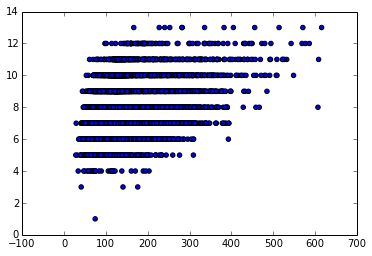

In [8]:
plt.scatter(b,a)
plt.show()

as we can see the price per sq m is closely correlated with grade.

In [13]:
model= graphlab.linear_regression.create(sales,target='price',features=['grade'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 20545

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.026008     | 6046765.512342     | 2613301.114152       | 274800.690095 | 244496.555381   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [15]:
result=model.evaluate(sales)

In [16]:
print result

{'max_error': 6046765.512341665, 'rmse': 273382.1268997077}


In [17]:
coeff=model['coefficients']

In [18]:
print coeff

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -1054246.92411 |  12627.566403 |
|    grade    |  None | 208267.800905  | 1629.51597675 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

